# Introduction

This notebook presents my approach to the problem called **_"Build a model that predicts the number of hits per session."_** from Trivago.

In [1]:
from string import ascii_letters
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 

## 1. Data set and summary information
<a id="load"></a>

In [2]:
df = pd.read_csv('datasets/case_study/ML Data Scientist Case Study Data.csv', sep=";")

In [3]:
train = df.loc[df.hits != '\\N'] # train set 
test = df.loc[df.hits == '\\N'] # test set

In [4]:
print('Number train entries:', len(train), ', Number test entries:', len(test))

Number train entries: 619235 , Number test entries: 369446


In [5]:
print('train column names and types:', train.dtypes, sep='\n')
print('-'*28)
print('test column names and types:', test.dtypes, sep='\n')

train column names and types:
row_num               int64
locale               object
day_of_week          object
hour_of_day           int64
agent_id              int64
entry_page            int64
path_id_set          object
traffic_type          int64
session_durantion    object
hits                 object
dtype: object
----------------------------
test column names and types:
row_num               int64
locale               object
day_of_week          object
hour_of_day           int64
agent_id              int64
entry_page            int64
path_id_set          object
traffic_type          int64
session_durantion    object
hits                 object
dtype: object


In [6]:
df.head(5)

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits
0,988681,L6,Monday,17,1,2111,31672;0,6,7037,\N
1,988680,L2,Thursday,22,10,2113,31965;0,2,49,14
2,988679,L4,Saturday,21,2,2100,0;78464,1,1892,14
3,988678,L3,Saturday,19,8,2113,51462,6,0,1
4,988677,L2,Tuesday,6,10,2116,31931;0,1,2,3


In [7]:
print('Train data set:  \n\n', train.count(), '\n')
print('Test data set:  \n\n', test.count(), '\n')

Train data set:  

 row_num              619235
locale               619235
day_of_week          619235
hour_of_day          619235
agent_id             619235
entry_page           619235
path_id_set          616082
traffic_type         619235
session_durantion    619235
hits                 619235
dtype: int64 

Test data set:  

 row_num              369446
locale               369446
day_of_week          369446
hour_of_day          369446
agent_id             369446
entry_page           369446
path_id_set          367710
traffic_type         369446
session_durantion    369446
hits                 369446
dtype: int64 



In [8]:
print('Columns and types :  \n\n', train.dtypes, '\n')

Columns and types :  

 row_num               int64
locale               object
day_of_week          object
hour_of_day           int64
agent_id              int64
entry_page            int64
path_id_set          object
traffic_type          int64
session_durantion    object
hits                 object
dtype: object 



In [9]:
# We change the type of hits to int
train['hits'] = train['hits'].astype('int')

We will also have to change the types of locale, day_of_week and session_durantion but it will require missing values input strategies.

In [10]:
print("Data set has {0} rows and {1} columns.".format(df.shape[0], df.shape[1]))

Data set has 988681 rows and 10 columns.


In [11]:
print("Train data set has {0} rows and {1} columns.".format(train.shape[0], train.shape[1]))

Train data set has 619235 rows and 10 columns.


In [12]:
print("Test data set has {0} rows and {1} columns.".format(test.shape[0], test.shape[1]))

Test data set has 369446 rows and 10 columns.


In [13]:
print("Proportions train / test set : {0}% / {1}%.".format(round(train.shape[0]/df.shape[0]*100, 2), round(test.shape[0]/df.shape[0]*100, 2)))

Proportions train / test set : 62.63% / 37.37%.


In [14]:
# Here we replace missing values \N by NaN
train.replace('\\N', np.nan, inplace=True)
test.replace('\\N', np.nan, inplace=True)

In [15]:
print('Missing values (NaN) in train set: \n\n', train.isna().sum(), '\n')
print('Missing values (NaN) in test set: \n\n', test.isna().sum())

Missing values (NaN) in train set: 

 row_num                 0
locale                  0
day_of_week             0
hour_of_day             0
agent_id                0
entry_page              0
path_id_set          3153
traffic_type            0
session_durantion     414
hits                    0
dtype: int64 

Missing values (NaN) in test set: 

 row_num                   0
locale                    0
day_of_week               0
hour_of_day               0
agent_id                  0
entry_page                0
path_id_set            1736
traffic_type              0
session_durantion       254
hits                 369446
dtype: int64


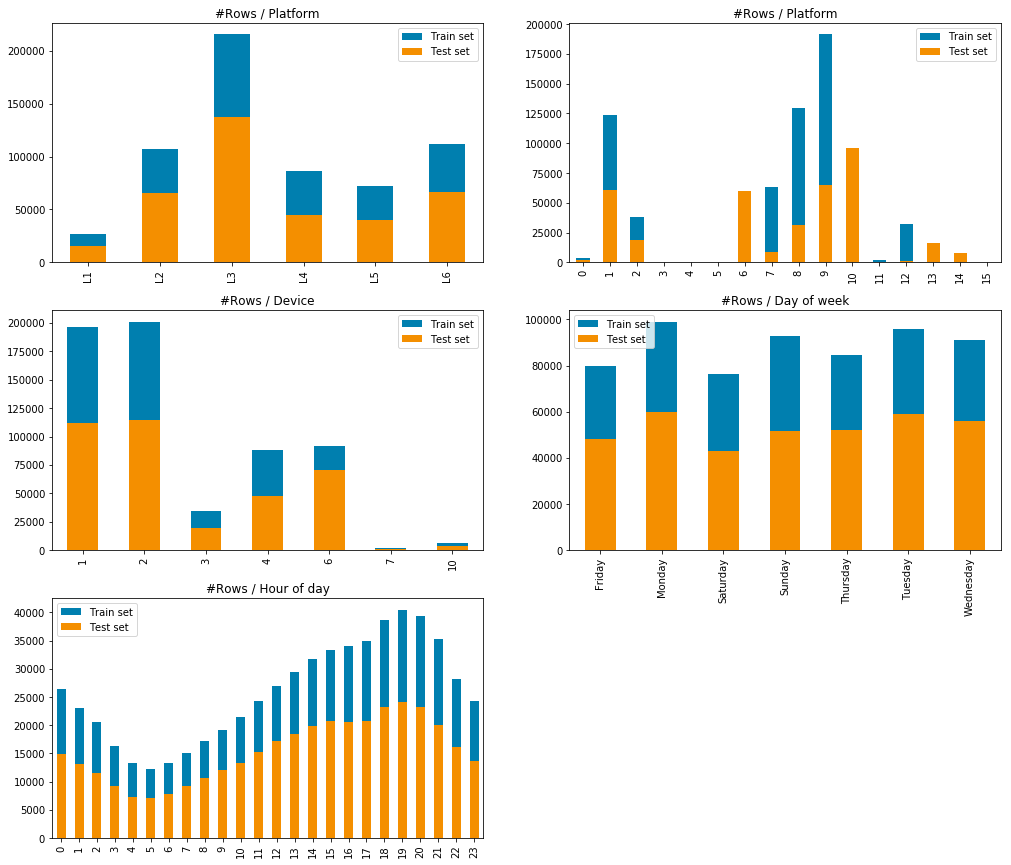

In [16]:
# Let's have a look at the proportion of rows for each category of each attributes
f, ax = plt.subplots(3,2, figsize=(17,15))
f.delaxes(ax[2,1])

train["locale"].value_counts().sort_index().plot(kind='bar', ax=ax[0,0], color='#007faf', label='Train set', title='#Rows / Platform', legend=True)
test["locale"].value_counts().sort_index().plot(kind='bar', ax=ax[0,0], color='#f48f00', label='Test set', legend=True)

train["agent_id"].value_counts().sort_index().plot(kind='bar', ax=ax[0,1], color='#007faf', label='Train set', title='#Rows / Platform', legend=True)
test["agent_id"].value_counts().sort_index().plot(kind='bar', ax=ax[0,1], color='#f48f00', label='Test set', legend=True)

train["traffic_type"].value_counts().sort_index().plot(kind='bar', ax=ax[1,0], color='#007faf', label='Train set', title='#Rows / Device', legend=True)
test["traffic_type"].value_counts().sort_index().plot(kind='bar', ax=ax[1,0], color='#f48f00', label='Test set', legend=True)

train["day_of_week"].value_counts().sort_index().plot(kind='bar', ax=ax[1,1], color='#007faf', label='Train set', title='#Rows / Day of week', legend=True)
test["day_of_week"].value_counts().sort_index().plot(kind='bar', ax=ax[1,1], color='#f48f00', label='Test set', legend=True)

train["hour_of_day"].value_counts().sort_index().plot(kind='bar', ax=ax[2,0], color='#007faf', label='Train set', title='#Rows / Hour of day', legend=True)
test["hour_of_day"].value_counts().sort_index().plot(kind='bar', ax=ax[2,0], color='#f48f00', label='Test set', legend=True)

## 2. Exploratory Data Analysis

In this section, we use visualization and statistical tools to analyse distributions and establish relations between the variable.

#### Feature: Hits

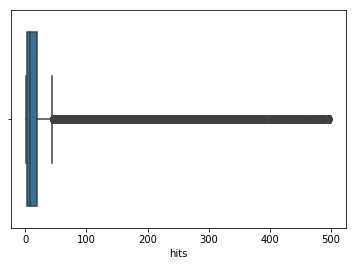

In [58]:
sns.boxplot(train.hits)

Boxplot shows a line because the data is concentrated under 500 hits. The distribution is not normal and there are possible outliers. Let's count them and look at the quantiles to make sure that there are really outliers. Due to the large number of hits above the 75 quartile

In [18]:
# Everything above ~1500 look like outliers.
obs_over_500 = list(train.loc[train['hits'] > 500].row_num)
print('There are',len(obs_over_500), 'observations above 500 hits.')

There are 493 observations above 500 hits.


In [19]:
print('Approximately 99.9% of our observations are under', int(np.quantile(train.hits, .999)),'hits.')

Approximately 99.9% of our observations are under 457 hits.


In [20]:
# Drop outliers
train = train[np.logical_not(train['row_num'].isin(obs_over_500))]

Therefore, we  decide to remove these observations that we believe are outliers.

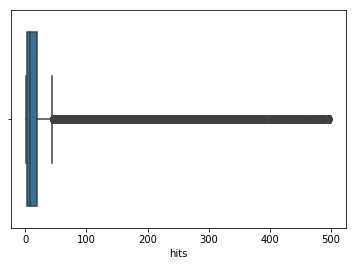

In [59]:
sns.boxplot(train.hits)

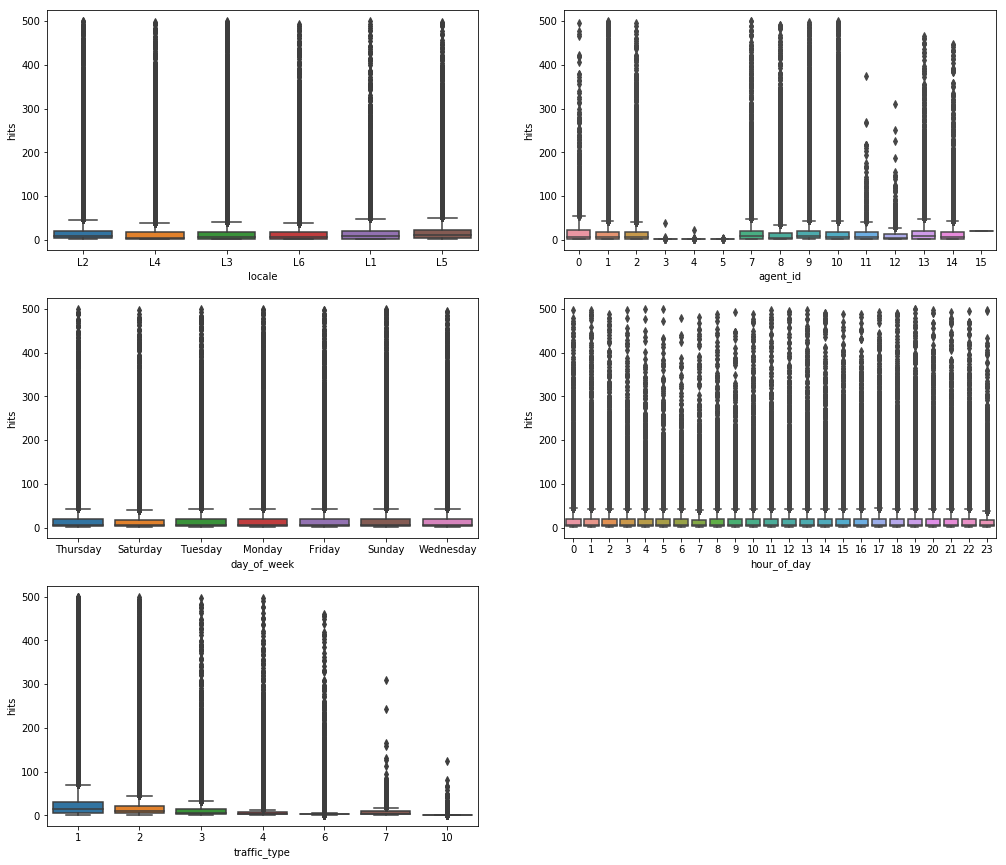

In [22]:
# With boxplot, we visualize if there are outliers
f, axes = plt.subplots(3, 2, figsize=(17,15))
f.delaxes(axes[2,1])

sns.boxplot(x='locale', y='hits', data=train, ax=axes[0,0])
sns.boxplot(x='agent_id', y='hits', data=train, ax=axes[0,1])
sns.boxplot(x='day_of_week', y='hits', data=train, ax=axes[1,0])
sns.boxplot(x='hour_of_day', y='hits', data=train, ax=axes[1,1])
sns.boxplot(x='traffic_type', y='hits', data=train, ax=axes[2,0])

In [23]:
def twentiles(series, title='', step=1, ax=None): 
    """Represent twentiles of input series. Implementation optimized for values distributing over diverse orders of magnitude"""
    bins = [round(e, 2) for e in np.linspace(0, 1, 21)]
    if ax==None:
        fig, ax = plt.subplots()
        quantiles = series.quantile(bins)
        (quantiles-min(quantiles)+1).apply(np.log).plot('bar', ax=ax)
    for patch, label in list(zip(ax.patches, quantiles.astype(int)))[::step]:
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width()/2, height, label, ha='center', va='bottom')
    ax.set_title(''.join([title, ' - Twentiles']))
    ax.set_xlabel('Twentile')
    ax.set_ylabel('log(rescaledInput)')
    if ax is None:
        plt.show()

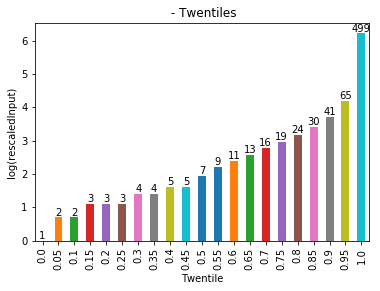

In [24]:
twentiles(train.hits)

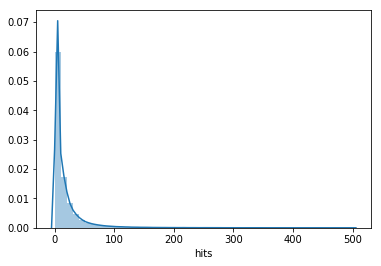

In [25]:
sns.distplot(train.hits)

The data is still skewed. We decide to apply a log transform to reduce skewness

In [26]:
train['log_hits'] = train["hits"].apply(np.log)

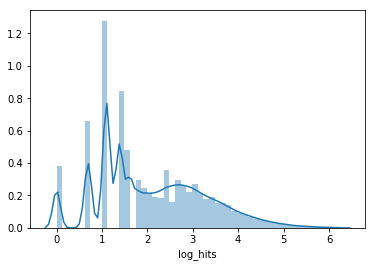

In [27]:
sns.distplot(train.log_hits)

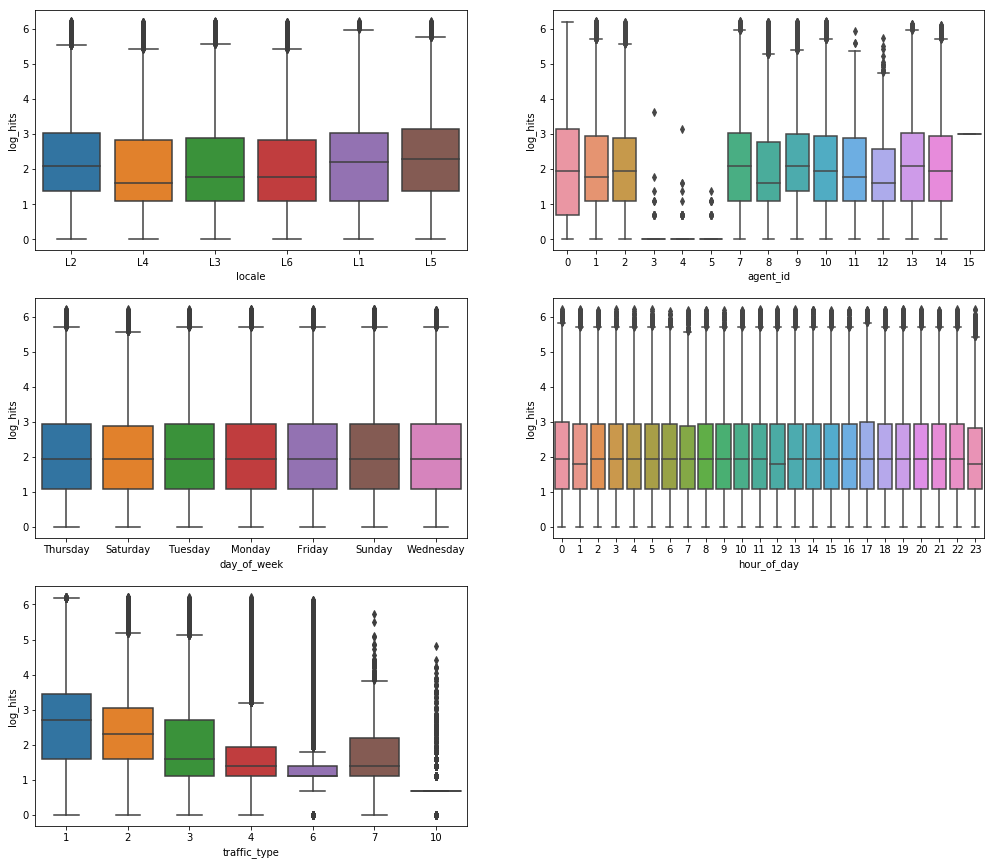

In [28]:
# With boxplot, we visualize if there are outliers
f, axes = plt.subplots(3, 2, figsize=(17,15))
f.delaxes(axes[2,1])

sns.boxplot(x='locale', y='log_hits', data=train, ax=axes[0,0])
sns.boxplot(x='agent_id', y='log_hits', data=train, ax=axes[0,1])
sns.boxplot(x='day_of_week', y='log_hits', data=train, ax=axes[1,0])
sns.boxplot(x='hour_of_day', y='log_hits', data=train, ax=axes[1,1])
sns.boxplot(x='traffic_type', y='log_hits', data=train, ax=axes[2,0])

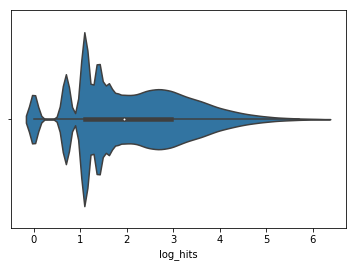

In [29]:
sns.violinplot(train.log_hits)

#### Feature: session_duration

In [42]:
train['session_durantion'] = pd.to_numeric(train['session_durantion'], errors='coerce')

In [71]:
train[train.session_durantion.isnull()].head(10)

,row_num,locale,day_of_week,hour_of_day,agent_id,entry_page,path_id_set,traffic_type,session_durantion,hits,log_hits
3562,985119,L3,Monday,0,8,8101,0,1,NaN,1,0.0
9948,978733,L2,Friday,7,7,8101,0,1,NaN,1,0.0
14262,974419,L3,Saturday,18,13,8101,0,1,NaN,1,0.0
20065,968616,L6,Tuesday,16,9,8101,0,1,NaN,1,0.0
21926,966755,L3,Wednesday,4,9,8101,0,1,NaN,1,0.0
24090,964591,L3,Tuesday,3,8,8101,0,1,NaN,1,0.0
24123,964558,L2,Tuesday,11,2,8101,0,1,NaN,1,0.0
26247,962434,L2,Thursday,7,2,8101,0,1,NaN,1,0.0
26990,961691,L2,Monday,11,7,8101,0,1,NaN,1,0.0
30190,958491,L1,Wednesday,2,8,8101,0,1,NaN,1,0.0


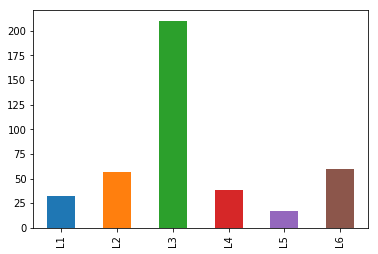

In [85]:
train[train.session_durantion.isnull()].locale.value_counts().sort_index().plot('bar')

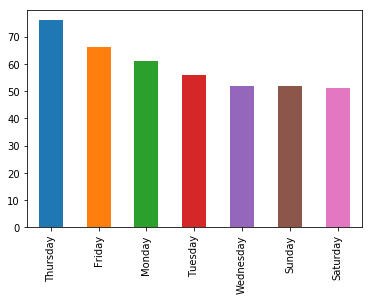

In [72]:
train[train.session_durantion.isnull()].day_of_week.value_counts().plot('bar')

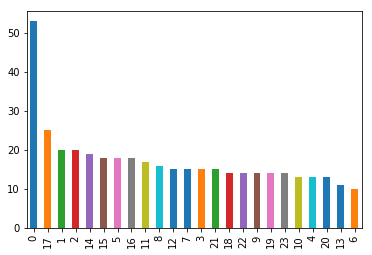

In [73]:
train[train.session_durantion.isnull()].hour_of_day.value_counts().plot('bar')

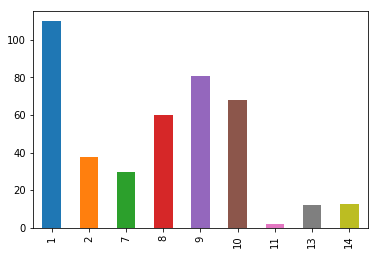

In [86]:
train[train.session_durantion.isnull()].agent_id.value_counts().sort_index().plot('bar')

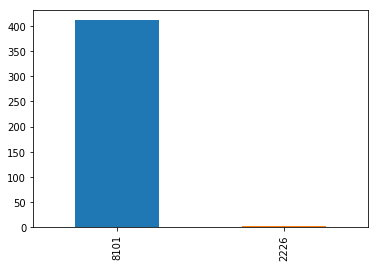

In [68]:
train[train.session_durantion.isnull()].entry_page.value_counts().plot('bar')

In [89]:
print('Channels for which the session_duration is missing:', train[train.session_durantion.isnull()].traffic_type.unique())

Channels for which the session_duration is missing: [1]


The missing values seem to concern the page 8101 for the channel 1, I suppose that there is something wrong with that combinaison and that needs to be cross-checked with the web dev team. Also, that problem seems to be particularly important at midnight. For now I decided to drop these observations.

In [54]:
series_sd = train[train.session_durantion.notnull()].session_durantion

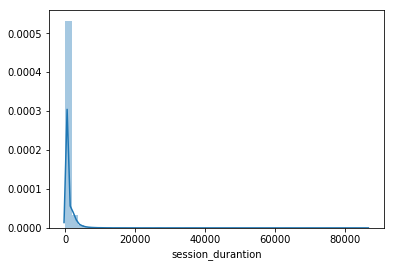

In [55]:
sns.distplot(series_sd)

In [56]:
series_sd.describe()

count    618328.000000
mean        492.922017
std        1960.769498
min           0.000000
25%           4.000000
50%          58.000000
75%         323.000000
max       86219.000000
Name: session_durantion, dtype: float64

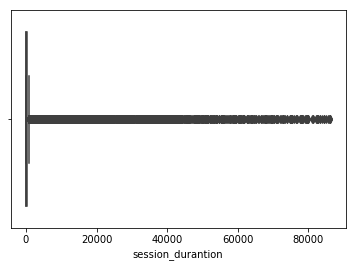

In [57]:
sns.boxplot(series_sd)

In [ ]:
train['log_hits'] = train["hits"].apply(np.log)